# INIT

In [1]:
import sys
sys.path.append('../../')
sys.path.append('../infras/cellMix/')
sys.path.append('../infras/cytof_data/')

In [2]:
from cytof_cell_count_infra import CytofCellCountInfra

In [3]:
import pandas as pd
import numpy as np
from functools import partial
import multiprocessing

from scipy.optimize import least_squares
from sklearn.metrics import mean_squared_error
from functools import partial
from scipy.optimize import minimize
import scipy.optimize
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
from deconv_py.preprocess.base import BasePreprocess as PP_base
from deconv_py.preprocess.cell_specific import CellSpecific as PP_proteins

from deconv_py.infras.data_factory import DataFactory
from deconv_py.infras.data_loader import DataLoader

from deconv_py.models.base import Base as Models_base
from deconv_py.models.cell_proportions_models import CellProportions
from deconv_py.models.cell_specific_models import CellSpecificPerPermutation

from deconv_py.experiments.cell_specific import CellSpecificMetricsPlot

from cellMix_coordinator import CellMixCoordinator

# read data

In [5]:
cci = CytofCellCountInfra()
sample_over_cytof_count =  cci.get_cytof_count_per_sample(filter_by_version="") 

# separate into groups : versions of same mixture | cross mixtures

In [6]:
all_pairwise_mixtures =  list(combinations(sample_over_cytof_count.columns,2))
same_mixture = list(filter(lambda x:(x[0].split("-")[1] == x[1].split("-")[1]),all_pairwise_mixtures))
cross_mixture = list(filter(lambda x:(x[0].split("-")[1] != x[1].split("-")[1]),all_pairwise_mixtures))

# test measures

## distribution of measure code 

In [7]:
def display_measures_dist(s_results,c_results,title):
    bins = np.linspace(min(c_results+s_results), max(c_results+s_results), 100)
    
    plt.hist(s_results, bins, alpha=0.8, label='same mixtures',weights=(np.ones_like(s_results)/len(s_results)))
    plt.hist(c_results, bins, alpha=0.5, label='cross mixtures',weights=(np.ones_like(c_results)/len(c_results)))
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

def calc_pairwise_measure_distribution(cytof_data,measure_function,same_mixture_list = None,cross_mixture_list = None,title = ""):
    '''
    this function get a measure function and calc and display distribution. we need another function that
    take pairwise datafram and filters
    '''
    if (same_mixture_list is None) or (cross_mixture_list is None) : 
        all_pairwise_mixtures =  list(combinations(sample_over_cytof_count.columns,2))
        same_mixture = list(filter(lambda x:(x[0].split("-")[1] == x[1].split("-")[1]),all_pairwise_mixtures))
        cross_mixture = list(filter(lambda x:(x[0].split("-")[1] != x[1].split("-")[1]),all_pairwise_mixtures))
    
    s_results = []
    for mixs in same_mixture_list :
        x = cytof_data[mixs[0]]
        y = cytof_data[mixs[1]]
        measure = measure_function(x,y)
        s_results.append(measure)
        
    c_results = []
    for mixs in cross_mixture_list :
        x = cytof_data[mixs[0]]
        y = cytof_data[mixs[1]]
        measure = measure_function(x,y)
        c_results.append(measure)
    
    display_measures_dist(s_results,c_results,title)
        

## correlation

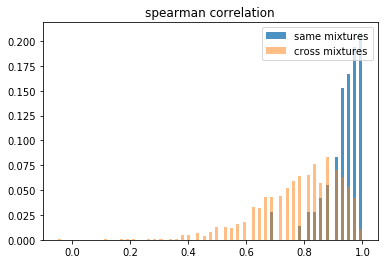

In [8]:
measure_function = lambda x,y:x.corr(y,method="spearman")
calc_pairwise_measure_distribution(sample_over_cytof_count,measure_function,same_mixture,cross_mixture,"spearman correlation")

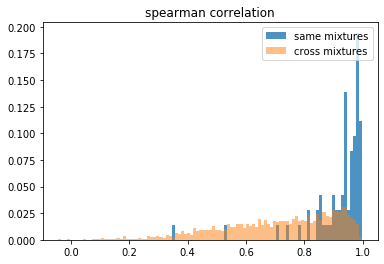

In [9]:
measure_function = lambda x,y:x.corr(y)
calc_pairwise_measure_distribution(sample_over_cytof_count,measure_function,same_mixture,cross_mixture,"spearman correlation")

## concordance

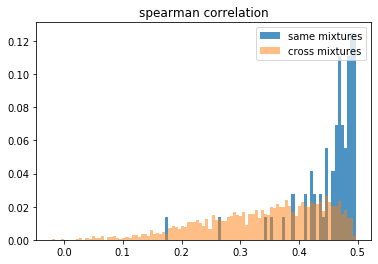

In [10]:
measure_function = lambda x,y:x.cov(y)/(x.var()+y.var())
calc_pairwise_measure_distribution(sample_over_cytof_count,measure_function,same_mixture,cross_mixture,"spearman correlation")

In [11]:
import pandas as pd
import numpy as np

deconv = pd.DataFrame(data=np.random.rand(8,72))
known = pd.DataFrame(data=np.random.rand(8,72))


In [12]:
dist_deco_from_known

NameError: name 'dist_deco_from_known' is not defined

In [ ]:
f

In [ ]:
np.diag(f).mean()

## RMSE

In [ ]:
measure_function = lambda x,y:np.sqrt(np.mean((x-y)**2))
calc_pairwise_measure_distribution(sample_over_cytof_count,measure_function,same_mixture,cross_mixture,"spearman correlation")

# not now

# known profile and Cytof

## dendrogram

In [ ]:
_profilte_to_cytof_cell_map = {'NOT_BCellmemory_01': 'B cells ',
                                  'NOT_BCellnaive_01': 'B cells ',
                                  'NOT_BCellplasma_01': 'B cells ',
                                  'NOT_CD4TCellmTregs_01': None,
                                  'NOT_CD4TCellnaive_01': 'Na?ve CD4 Tcell',
                                  'NOT_CD4TCellnTregs_01': None,
                                  'NOT_CD4TCellTcm_01': 'CD4+central memory Tcells',
                                  'NOT_CD4TCellTem_01': 'CD4+ effector memory T cells',
                                  'NOT_CD4TCellTemra_01': None,
                                  'NOT_CD4TCellTh1_01': None,
                                  'NOT_CD4TCellTh17_01': None,
                                  'NOT_CD4TCellTh2_01': None,
                                  'NOT_CD8TCellnaive_01': 'Na?ve CD8 Tcell',
                                  'NOT_CD8TCellTcm_01': None,
                                  'NOT_CD8TCellTem_01': 'CD8+ effector memory T cells',
                                  'NOT_CD8TCellTemra_01': None,
                                  'NOT_DendriticCD1c_01': 'Plasmacytoid dendritic cells',
                                  'NOT_DendriticCD304_01': 'Plasmacytoid dendritic cells',
                                  'NOT_Erythrocytes_01': None,
                                  'NOT_Monocytesclassical_01': 'Monocytes',
                                  'NOT_Monocytesintermediate_01': 'Monocytes',
                                  'NOT_Monocytesnonclassical_01': 'Monocytes',
                                  'NOT_NKCellsCD56bright_01': None,
                                  'NOT_NKCellsCD56dim_01': None,
                                  'NOT_Thrombocytes_01': None}
# cci.cytof_label_propagation(A)
mass_cell_to_cytof_label = cci.cytof_label_propagation(A.T.copy(deep=True))
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("cell profile Dendograms,green - with label,red -  without")

dend = shc.dendrogram(shc.linkage(A.T, method='ward'),labels=A.columns,orientation='right')

labeld_cells = [cell for cell,cytof in _profilte_to_cytof_cell_map.items() if cytof is not None] 
label_colors = {**{cell:"g" for cell in A.columns if cell in labeld_cells},**{cell:"r" for cell in A.columns if cell not in labeld_cells}}

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

## pca

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(A.T)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],index = A.T.index)
# principalDf

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('green - with label,red -  without', fontsize = 20)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=[label_colors[ce] for ce in principalDf.index.tolist()], s = 50)

for i, txt in enumerate(principalDf.index):
    ax.annotate(txt, (principalDf['principal component 1'].iloc[i], principalDf['principal component 2'].iloc[i]))


ax.grid()

## tsne

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca = TSNE(n_components=2,learning_rate = 20,method='exact')
principalComponents = pca.fit_transform(A.T)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],index = A.T.index)
# principalDf

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('green - with label,red -  without', fontsize = 20)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=[label_colors[ce] for ce in principalDf.index.tolist()], s = 50)

for i, txt in enumerate(principalDf.index):
    ax.annotate(txt, (principalDf['principal component 1'].iloc[i], principalDf['principal component 2'].iloc[i]))


ax.grid()

In [ ]:
?TSNE